In [1]:
"""The idea of regression is to take in continous data and draw a best fit line; 
which basically boils down into modelling your data"""


#Basics Of Regression: 1


import pandas as pd
import quandl as ql
data=ql.get('WIKI/GOOGL')
#pd.set_option('display.max_columns', 12)
#print(data.head())
data1=data[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume']]
#Your first job for building a regressive model is to look for the datasets which have
#relevant data or relation between datas; as in this case we dont need all the columns of the stock prices
#we just need the relevent columns like Adjusted columns

#print(data1.head())
data1['HL_PCT']=( (data1['Adj. High']-data1['Adj. Low'])/data1['Adj. Low'] )* 100.0
#HL_PCT= High to Low Percent change= (New Price(adj. high)- Old Price(adj. Low))/Old Price(adj. Low)*100.0

data1['PCT_change']=( (data1['Adj. Close']-data1['Adj. Open'])/data1['Adj. Open'] )* 100.0
#PCT_Change= Total Percent Change= 
# [(Closing Price of the day{Adj. CLose}-Opening Price for the day{Adj. Open})/Opening Price{Adj. Open}]*100.0
data1=data1[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
print(data1.head())

            Adj. Close    HL_PCT  PCT_change  Adj. Volume
Date                                                     
2004-08-19   50.322842  8.441017    0.324968   44659000.0
2004-08-20   54.322689  8.537313    7.227007   22834300.0
2004-08-23   54.869377  4.062357   -1.227880   18256100.0
2004-08-24   52.597363  7.753210   -5.726357   15247300.0
2004-08-25   53.164113  3.966115    1.183658    9188600.0


C:\Users\acer\AppData\Local\Temp\ipykernel_16676\314541235.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['HL_PCT']=( (data1['Adj. High']-data1['Adj. Low'])/data1['Adj. Low'] )* 100.0
C:\Users\acer\AppData\Local\Temp\ipykernel_16676\314541235.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['PCT_change']=( (data1['Adj. Close']-data1['Adj. Open'])/data1['Adj. Open'] )* 100.0


In [2]:
"""Regression: Features and labels
    - Features: Are the input variables. X in regression
    - Labels: Are the values which we are Predicting. In Regression the Y-variable"""


#Regression setting out basic Features and Labels:


import math
import pandas as pd
import quandl as ql
data=ql.get('WIKI/GOOGL')
data1=data[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume']]
data1['HL_PCT']=( (data1['Adj. High']-data1['Adj. Low'])/data1['Adj. Low'] )* 100.0
data1['PCT_change']=( (data1['Adj. Close']-data1['Adj. Open'])/data1['Adj. Open'] )* 100.0
data1=data1[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
data1.fillna(-99999, inplace=True)
forecast_col='Adj. Close' #Just a variable to help out the forecast(prediction)
forecast_out=math.ceil(0.01*len(data1))
data1['New Label']=data1[forecast_col].shift(-forecast_out)
data1.dropna(inplace=True)
print(data1.head(5), '\n\n', data1.tail(5))

"""Basic Regressive Model^^"""

            Adj. Close    HL_PCT  PCT_change  Adj. Volume  New Label
Date                                                                
2004-08-19   50.322842  8.441017    0.324968   44659000.0  69.078238
2004-08-20   54.322689  8.537313    7.227007   22834300.0  67.839414
2004-08-23   54.869377  4.062357   -1.227880   18256100.0  68.912727
2004-08-24   52.597363  7.753210   -5.726357   15247300.0  70.668146
2004-08-25   53.164113  3.966115    1.183658    9188600.0  71.219849 

             Adj. Close    HL_PCT  PCT_change  Adj. Volume  New Label
Date                                                                
2018-01-30     1177.37  1.142604   -0.029718    1792602.0    1094.00
2018-01-31     1182.22  1.213207   -0.134312    1643877.0    1053.15
2018-02-01     1181.59  1.547000    0.476195    2774967.0    1026.55
2018-02-02     1119.20  1.811604   -0.729098    5798880.0    1054.09
2018-02-05     1068.76  5.512236   -2.893850    3742469.0    1006.94


C:\Users\acer\AppData\Local\Temp\ipykernel_16676\1060203273.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['HL_PCT']=( (data1['Adj. High']-data1['Adj. Low'])/data1['Adj. Low'] )* 100.0
C:\Users\acer\AppData\Local\Temp\ipykernel_16676\1060203273.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['PCT_change']=( (data1['Adj. Close']-data1['Adj. Open'])/data1['Adj. Open'] )* 100.0
C:\Users\acer\AppData\Local\Temp\ipykernel_16676\1060203273.py:17: SettingWithCopyWarning: 
A value is trying t

'Basic Regressive Model^^'

##### Regression: Training and Testing the data

In [3]:
import math, quandl
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import svm, preprocessing
#Importing all necessary libraries

#Data Source for ML: Quandl.com; stocks of google

df = quandl.get('WIKI/GOOGL')
#print(df.head(5))

df= df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume']]
df['HL_PCT']= ( (df['Adj. High']-df['Adj. Low'])/df['Adj. Low']) * 100.0
df['PCT_Change']= ((df['Adj. Close']-df['Adj. Open'])/df['Adj. Open']) * 100.0

df= df[['Adj. Close', 'HL_PCT', 'PCT_Change', 'Adj. Volume']]
df.fillna(value=-9999, inplace=True)
forecast_col= 'Adj. Close'
forecast_out= int(math.ceil(0.01* len(df)))

df['Label']= df[forecast_col].shift(-forecast_out)
df.dropna(inplace=True)
#print(df.head())

#In training and testing: 'X' denotes the Features and, 'y' denotes the labels

X= np.array(df.drop(['Label'], axis=1))   #X would consist of all the meaningful data thats necessary for prediction
y= np.array(df['Label'].values)

X= preprocessing.scale(X)

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3)  #Preparing our train and test data

#We are not keeping the test size for train data as -forecast_out because we already shifted the data acc to it
#Same for test data as the main df was shifted by the size of -forecast_out

clf= LinearRegression(n_jobs=-1) #Preparing our 1st Regression model
#For note purposes: LinearRegression can be threaded simply: 
#n_jobs parameter will set the threading values
#setting n_jobs=-1 implies that we are runnig all jobs that can be done by our CPU 
#threading= is the process of completing as many jobs possible by CPU's cores
#Threading is simple for LR and can be run on massive datasets but its not simple as for Support Vector Machines




clf.fit(X_train, y_train) #training the classifier 

accuracy = clf.score(X_test, y_test) #checking accuracy
print(accuracy)


0.9780189256960619


##### So our classifier's accuracy is: 97.7%

In [4]:
#Another approach to the problem using SVR[Support Vector Regression]


from sklearn import svm

for kernel in ['rbf', 'poly', 'linear', 'sigmoid']:
    clf1= svm.SVR(kernel=kernel)
    clf.fit(X_train, y_train)
    acc= clf.score(X_test, y_test)
    print(f'Result for kernel={kernel}:', acc)

Result for kernel=rbf: 0.9780189256960619
Result for kernel=poly: 0.9780189256960619
Result for kernel=linear: 0.9780189256960619
Result for kernel=sigmoid: 0.9780189256960619


## Always keep the Sklearn docs beside you while working as we cannot ignore some of the params, as they might be helpful later on

### Regression: Forecasting and Predicting:

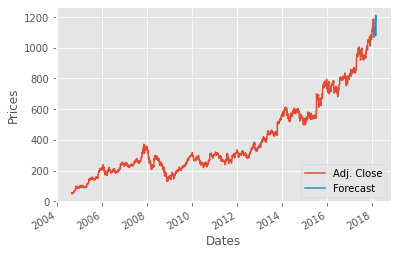

In [8]:
import math, quandl, datetime
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import svm, preprocessing
import matplotlib.pyplot as plt
from matplotlib import style
#Importing all necessary libraries
style.use('ggplot')
#Data Source for ML: Quandl.com; stocks of google

df = quandl.get('WIKI/GOOGL')
#print(df.head(5))

df= df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume']]
df['HL_PCT']= ( (df['Adj. High']-df['Adj. Low'])/df['Adj. Low']) * 100.0
df['PCT_Change']= ((df['Adj. Close']-df['Adj. Open'])/df['Adj. Open']) * 100.0

df= df[['Adj. Close', 'HL_PCT', 'PCT_Change', 'Adj. Volume']]
df.fillna(value=-9999, inplace=True)
forecast_col= 'Adj. Close'
forecast_out= int(math.ceil(0.01* len(df)))

df['Label']= df[forecast_col].shift(-forecast_out)
df.dropna(inplace=True)
#print(df.head())

#In training and testing: 'X' denotes the Features and, 'y' denotes the labels

X=np.array( df.drop(['Label'], axis=1) )  #X would consist of all the meaningful data thats necessary for prediction

X= preprocessing.scale(X)   #Scaling data is helpful for short amount of datasets

X_lately=X[-forecast_out:]
#X=X[:-forecast_out]

df.dropna(inplace=True)



y= np.array(df['Label'].values)
#y= df['Label']



X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2)  #Preparing our train and test data

#We are not keeping the test size for train data as -forecast_out because we already shifted the data acc to it
#Same for test data as the main df was shifted by the size of -forecast_out

clf= LinearRegression(n_jobs=-1) #Preparing our 1st Regression model
#For note purposes: LinearRegression can be threaded simply: 
#n_jobs parameter will set the threading values
#setting n_jobs=-1 implies that we are runnig all jobs that can be done by our CPU 
#threading= is the process of completing as many jobs possible by CPU's cores
#Threading is simple for LR and can be run on massive datasets but its not simple as for Support Vector Machines




clf.fit(X_train, y_train) #training the classifier 

accuracy = clf.score(X_test, y_test) #checking accuracy

forecast_set= clf.predict(X_lately)  #predicting the prices using the values of X from the forecast_out

#print(forecast_set, accuracy, forecast_col)


#Hard coding all the days for prediction values

df['Forecast']= np.nan
last_date= df.iloc[-1].name
last_unix= last_date.timestamp()
one_day=86400   #Number of hrs in one day
next_unix= last_unix+one_day

#Populating the dataframe with values from forecast_set

for i in forecast_set:
    next_date= datetime.datetime.fromtimestamp(next_unix)
    next_unix+=one_day
    df.loc[next_date]=[np.nan for _ in range(len(df.columns)-1)] + [i]
    
    
## Explanation for the for loop:
"""next_date will store the dates generated from next_unix,
    now next_unix is updated by every one day value
    now the next_date valued column is firstly filled with np.nan values which gets replaced by the [i] which 
    is each element in the forecast_set"""

#Plotting A Plot for the predicted prices

df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc='lower right')
plt.xlabel("Dates")
plt.ylabel("Prices")
plt.savefig("Stock_Predict.png")
plt.show()
